<a href="https://colab.research.google.com/github/ptavares96/dados_ausentes_outliers/blob/main/Dados_ausentes_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza de dados

É comum em uma análise exploratória de dados nos depararmos com duas situações: uma quantidade grande de dados faltando ou alguns dados estarem fora da realidade proposta (outliers). Nesses dois casos é dever do cientista de dados escolher uma solução para essas situações.

Para as duas situações há duas soluções que dependerão dos casos. A primeira solução é a exclusão dos dados. Nesses casos de exclusão, previamente é preciso verificar se os a ausência desses dados não carrega algum significado, se são poucos e se ocorrem aleatoriamente. Em casos de preenchimento dos dados as entradas podem ser preenchidas por zeros ou valores estatísticos como: média, mediana ou moda. Em casos mais específicos e de muito conhecimento sobre os dados pode ser usado ferramentas de machine learning para o preenchimento.


## Importação dos dados

In [1]:
# importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 

pd.set_option('display.max_rows', None)

Os dados utilziados são referentes a alugueis disponibilizados no Airbnb na ciade de Austin, Texas. 

In [2]:
#importando so dados
df = pd.read_csv("http://data.insideairbnb.com/united-states/tx/austin/2022-06-08/data/listings.csv.gz")

## Visualizando a quantidade de dados faltantes

In [3]:
# identificar o volume de dados do DataFrame
print(f'No dataset há {df.shape[0]} entradas e {df.shape[1]} atributos (variáveis)')
# tipos de variáveis
print('\nOs tipos de varíaveis do dataset são:')
df.dtypes

No dataset há 17071 entradas e 74 atributos (variáveis)

Os tipos de varíaveis do dataset são:


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

Já é possível verificar que esse é um dataset extenso.

In [4]:
print("A quantidade dos valores ausentes para cada variável:\n")
df.isnull().sum().sort_values(ascending = False)

A quantidade dos valores ausentes para cada variável:



neighbourhood_group_cleansed                    17071
bathrooms                                       17071
calendar_updated                                17071
license                                         17071
neighborhood_overview                            6992
neighbourhood                                    6992
host_about                                       6763
host_neighbourhood                               4670
host_response_time                               3560
host_response_rate                               3560
review_scores_value                              3365
review_scores_location                           3365
review_scores_checkin                            3364
review_scores_communication                      3362
review_scores_cleanliness                        3362
review_scores_accuracy                           3362
first_review                                     3292
reviews_per_month                                3292
last_review                 

É visto que as variáveis **neighbourhood_group_cleansed, bathrooms, calendar_updated, license** possuem as maiores quantidades de dados ausentes. 

O ideal é visualizar a porcentagem que esses dados ausentes fazem parte no dataset.

In [5]:
print("Quantidade de valores ausentes, em porcentagem (%) para cada variável:\n")
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

Quantidade de valores ausentes, em porcentagem (%) para cada variável:



neighbourhood_group_cleansed                    100.000000
bathrooms                                       100.000000
calendar_updated                                100.000000
license                                         100.000000
neighborhood_overview                            40.958350
neighbourhood                                    40.958350
host_about                                       39.616894
host_neighbourhood                               27.356335
host_response_time                               20.854080
host_response_rate                               20.854080
review_scores_value                              19.711792
review_scores_location                           19.711792
review_scores_checkin                            19.705934
review_scores_communication                      19.694218
review_scores_cleanliness                        19.694218
review_scores_accuracy                           19.694218
first_review                                     19.2841

É possível concluir que não há valores nas variáveis **neighbourhood_group_cleansed, bathrooms, calendar_updated, license**, podendo assim excluir as colunas que as representam. 

## Excluindo dados ausentes

Como não há valores para as variáveis **neighbourhood_group_cleansed, bathrooms, calendar_updated, license** é possível realizar a exclusão destas colunas. 

In [6]:
# elimiando colunas com valores ausentes:
df.drop(columns=['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license'], inplace=True)

Após eliminadas as colunas com os valore ausentes a atenção agora será para as entradas com valores ausentes.

In [7]:
print(f'No novo dataset há {df.shape[0]} entradas e {df.shape[1]} atributos (variáveis)\n')
print("Quantidade de valores ausentes, em porcentagem (%) para cada variável após exclusão de quatro colunas:\n")
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

No novo dataset há 17071 entradas e 70 atributos (variáveis)

Quantidade de valores ausentes, em porcentagem (%) para cada variável após exclusão de quatro colunas:



neighbourhood                                   40.958350
neighborhood_overview                           40.958350
host_about                                      39.616894
host_neighbourhood                              27.356335
host_response_rate                              20.854080
host_response_time                              20.854080
review_scores_value                             19.711792
review_scores_location                          19.711792
review_scores_checkin                           19.705934
review_scores_accuracy                          19.694218
review_scores_cleanliness                       19.694218
review_scores_communication                     19.694218
review_scores_rating                            19.284166
last_review                                     19.284166
first_review                                    19.284166
reviews_per_month                               19.284166
host_acceptance_rate                            17.368637
bedrooms      

É observado que ainda há algumas variáveis com valores ausentes em algumas variáveis. Porém exluir uma linha completa pela falta de uma informação pode prejudicar uma escolha. Para isso é escolhido um critério a ser observado, ou seja, que entre todas as variáveis há uma variável de maior peso ao escolher um lugar para alugar. Definindo então que essa variável seja **price**, exluir uma linha com valor ausente vai influenciar na estatística dessa variável. 

Uma segunda variável para escolher como critério de alugel é **minumum_nights**, que indica o mínimo de noites necessárias para alugar um imóvel. Verifica-se que nela também não há valores ausentes, assim a exclusão de uma linha também pode influencia na estatística da variável. 

Escolhido então as variáveis mais importantes, é necessário analisá-las individualmente. 

## Analisando a distribuição das variáveis

É interessante ao realizar alguma mudança no dataset e evitar ter que rodar partes do código desde o início criar um ponto de retorno. O ponto de retorno é criado copiando o dataset original para um novo dataset. 

In [8]:
#criando um ponto de retorno para o dataset original
df_c = df.copy()

É verificado que há um problema na variável price. Ela está escrita de forma de string e com caracteres cifrão ($) e vírgula (,) e isso deixa impossível realizar a análise estatística necessária. Para isso será então deletado esses caracteres e converter a variável price para tipo float. 

In [9]:
#retirando o sifrão ($) da variável price e as vírgulas
df_c['price'] = df_c['price'].str.replace("$","")
df_c['price'] = df_c['price'].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [10]:
#convertendo as variáveis price e minimum_nights para float
df_c[['price', 'minimum_nights']] = df_c[['price', 'minimum_nights']].astype('float')

Realizando uma descrição estatística prévia para que seja possivél fazer algumas observações. 

In [11]:
#descrição estatística
df_c[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,17071.000000,17071.000000
mean,294.265479,7.610275
std,584.119849,25.212387
min,0.000000,1.000000
25%,107.000000,1.000000
50%,175.000000,2.000000
75%,298.000000,3.000000
max,23000.000000,1100.000000


Aqui é visto que há alguns valores que chamam atenção, como para a variável price um valor máximo de aluguel de \$23000,00 e com 75% dos valores abaixo de \$298,00.
Na variável minimum_nights um valor máximo de 1100 noites mínimas para alugar sendo que 75% dos valores estão abaixo de 3 noites. Para uma melhor observação é válido olhar como esses valores estão distribuídos. 

In [12]:
sns.set_theme(style="whitegrid", palette='mako')

A melhor maneira de observar como estão distribuídos os valores em uma variável 
é a partir de um histograma.  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

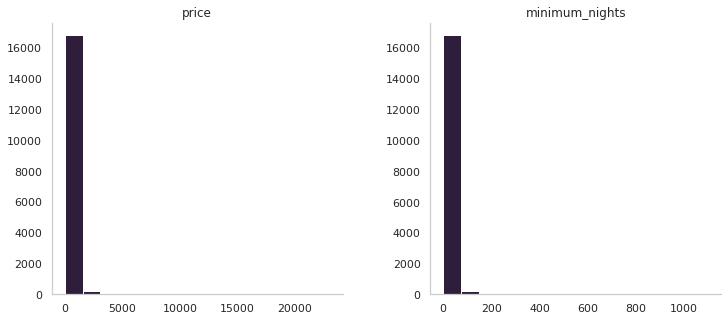

In [13]:
#histograma das variáveis price e minimum_nights
df_c[['price', 'minimum_nights']].hist(bins=15, figsize = (12,5), grid=False);
plt.savefig('hist_clean.png', dpi=100, bbox_inches='tight')
files.download('hist_clean.png') 
sns.despine()

Olhando para o histograma das variáveis é visto então uma má distribuição já que maior parte dos valores se concentram em um intervalo. Com os resultados da descrição estatística e com a distribuição supõe que há valores discrepantes, **outliers**. Esses valores atrapalham em uma análise exploratória mais rígida e é necessário eliminá-los ou em alguns casos preencher com outros valores (moda, média ou mediana).  

## Lidando com valores outliers

Um outro modo de observar os outliers das variáveis é a partir de um gráfico de boxplot. Nele é representado os valroes em quantils, que é uma divisão dos valores em quatro partes. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

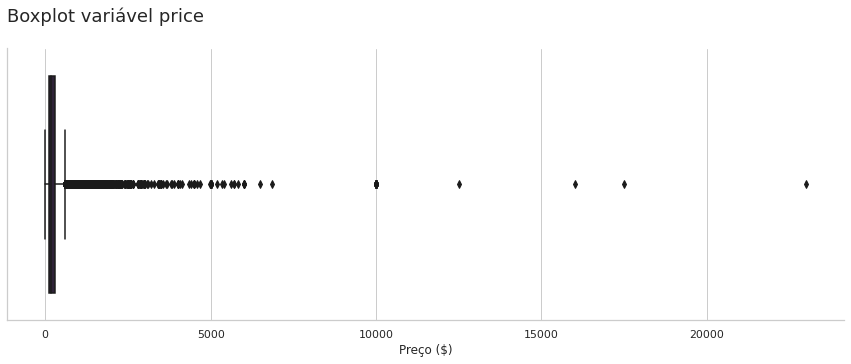

In [14]:
#boxplot para a variável price
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=df_c['price'])
ax.set_title('Boxplot variável price\n', loc='left', fontsize=18)
ax.set_xlabel('Preço ($)')
sns.despine()
plt.savefig('boxplot_price.png', dpi=100, bbox_inches='tight')
files.download('boxplot_price.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

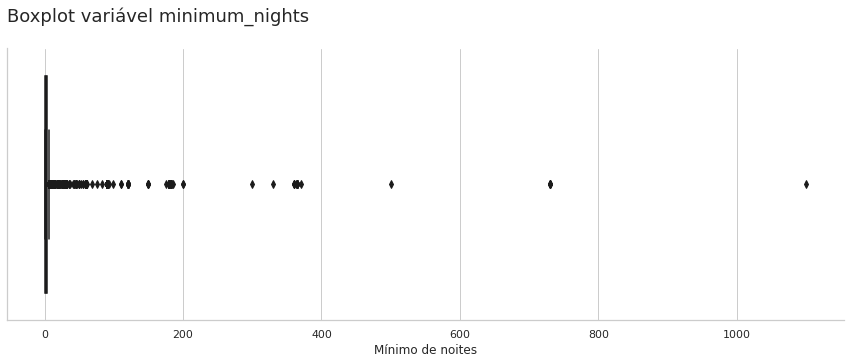

In [15]:
#boxplot para a variável price
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(x=df_c['minimum_nights'])
ax.set_title('Boxplot variável minimum_nights\n', loc='left', fontsize=18)
ax.set_xlabel('Mínimo de noites')
sns.despine()
plt.savefig('boxplot_minimum_nights.png', dpi=100, bbox_inches='tight')
files.download('boxplot_minimum_nights.png')

A partir dos boxplots é visto que há valores muito altos nessas variáveis Para então uma análise estatística mais acurada é necessário eliminar esses valores. 

In [ ]:
#identificando os outliers para a variavel price
q1_price = df_c.price.quantile(0.25)
q3_price = df_c.price.quantile(0.75)
IQR_price = q3_price - q1_price 
print('IQR da variavel price:', IQR_price)

#definindo limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)

IQR da variavel price: 191.0
Limite superior de price: 584.5
Limite inferior de price: -179.5


In [37]:
print("O dataset possui {} entradas".format(df_c.shape[0]))
print("{} entradas com preços acima de $584,50".format(len(df_c[df_c.price > 584.5])))
print("As entradas com preços acima de $584,50 representam {:.2f}% do dataset".format((len(df_c[df_c.price > 584.5])/df_c.shape[0])*100))
print("{} entradas com preços iguais a $0,00".format(len(df_c[df_c.price == 0])))
print("As entradas com preços iguais a $0,00 representam {:.2f}% do dataset".format((len(df_c[df_c.price == 0])/df_c.shape[0])*100))

O dataset possui 17071 entradas
1569 entradas com preços acima de $584,50
As entradas com preços acima de $584,50 representam 9.19% do dataset
4 entradas com preços igual a $0,00
As entradas com preços igual a $0,00 representam 0.02% do dataset


In [29]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_c.minimum_nights.quantile(.25)
q3_minimum_nights = df_c.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


In [38]:
print("O dataset possui {} entradas".format(df_c.shape[0]))
print("{} Entradas acima com noites mínimas acima de 6".format(len(df_c[df_c.minimum_nights > 6.0])))
print("As entradas com noites mínimas acima de 6 representam {:.2f}% do dataset".format((len(df_c[df_c.minimum_nights > 6.0]) / df_c.shape[0])*100))

O dataset possui 17071 entradas
2669 Entradas acima com noites mínimas acima de 6
As entradas com noites mínimas acima de 6 representam 15.63% do dataset


In [39]:
# adicionando um segundo ponto de retorno
df_clean = df_c.copy()

# excluindo ouliers das variáveis 'price' e 'minimum_nights'
df_clean.drop(df_clean[df_clean.price > 584.5].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis = 0, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

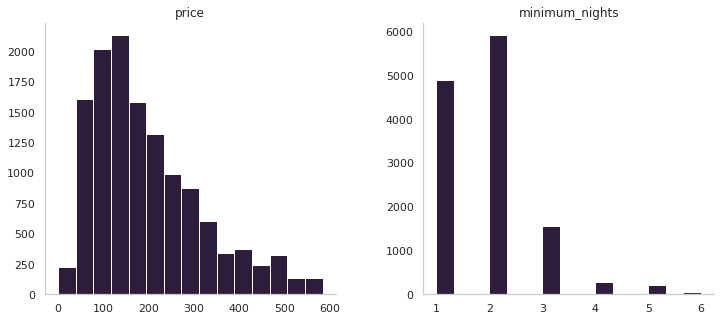

In [40]:
#histograma das variáveis price e minimum_nights
ax = df_clean[['price', 'minimum_nights']].hist(bins=15, figsize = (12,5), grid=False);
sns.despine()
plt.savefig('hist_clean_clean.png', dpi=100, bbox_inches='tight')
files.download('hist_clean_clean.png') 

## Conclusão
A limpeza de dados é necessária para corrigir alguns dados faltantes ou dados  muito discrepantes. No início do dataset foi observado que havia colunas sem valores, assim foi necessário eliminá-las. Um outro caso pode ser colunas com muitos valores ausentes e que a falta da variável não influencia em nenhuma análise.
 
Foram analisadas as variáveis: 'price' e 'minimum_nights'. Estas variáveis foram escolhidas por poderem fazer parte de um critério para escolha de aluguéis da região do dataset. Nessas variáveis haviam valores muito acima da realidade, sendo necessário utiliza-se do método IQR para exclusão desses outliers.